In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from sklearn.model_selection import KFold
import glob as gb
from skimage import io

In [ ]:
os.chdir('/content/drive/MyDrive/Dissertation/MFS/MFS 25/14 Samples/ORIGINAL MFS S-TRANSFROM IMAGES/')

In [ ]:
seed = 7
np.random.seed(seed)

In [ ]:
SIZE = 28 # image size

In [ ]:
# original images
train_images = []
train_labels = [] 
for directory_path in sorted(glob.glob("/content/drive/MyDrive/Dissertation/MFS/MFS 25/14 Samples/ORIGINAL MFS S-TRANSFROM IMAGES/160 Images/*")):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        #print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

BALL
HEALTHY
INNER
OUTER


In [ ]:
# GAN images
test_images = []
test_labels = [] 
for directory_path in sorted(glob.glob("/content/drive/MyDrive/Dissertation/MFS/MFS 25/14 Samples/ORIGINAL MFS S-TRANSFROM IMAGES/GAN/*")):
    fruit_label = directory_path.split("/")[-1]
    print(fruit_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

BALLGAN
HEALTHYGAN
INNERGAN
OUTERGAN


In [ ]:
'''# Merge inputs and targets
inputs = np.concatenate((train_images, test_images), axis=0)
targets = np.concatenate((train_labels, test_labels), axis=0)'''

'# Merge inputs and targets\ninputs = np.concatenate((train_images, test_images), axis=0)\ntargets = np.concatenate((train_labels, test_labels), axis=0)'

In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [ ]:
train_images.shape

(640, 28, 28, 3)

In [ ]:
x_train = []
y_train = []
x_test = []
y_test = []
y_train_one_hot = []
y_test_one_hot = []

In [ ]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [ ]:
###################################################################
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0
#x_train = x_train / 255.0
#One hot encode y values for neural network. 
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
#############################
# K-fold Cross Validation model evaluation

#for train, test in kfold.split(x_train, y_train_one_hot):
model = Sequential()

model.add(Conv2D(28, (3, 3), input_shape=(SIZE, SIZE, 3), padding= 'same' ,activation= 'relu' ))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(28, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(28, (3, 3), activation='relu',padding='same'))
model.add(Flatten())

models = model.output
models = Dense(512, activation='relu')(models)
models = Dense(4, activation='softmax') (models)
mo = models

cnn_model = Model(inputs=model.input, outputs=mo)
cnn_model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary()) 

##########################################
#Train the CNN model
history = cnn_model.fit(x_test, y_test_one_hot, batch_size=128, epochs=100, validation_data=(x_test, y_test_one_hot))


scores = cnn_model.evaluate(x_test, y_test_one_hot, verbose=2)
print('loss is %6f and acc is %4f'%((scores[0]),(scores[1]*100)))

In [ ]:
'''#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()'''

"#plot the training and validation accuracy and loss at each epoch\nloss = history.history['loss']\nval_loss = history.history['val_loss']\nepochs = range(1, len(loss) + 1)\nplt.plot(epochs, loss, 'y', label='Training loss')\nplt.plot(epochs, val_loss, 'r', label='Validation loss')\nplt.title('Training and validation loss')\nplt.xlabel('Epochs')\nplt.ylabel('Loss')\nplt.legend()\nplt.show()"

In [ ]:
'''acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()'''

"acc = history.history['accuracy']\nval_acc = history.history['val_accuracy']\nplt.plot(epochs, acc, 'y', label='Training acc')\nplt.plot(epochs, val_acc, 'r', label='Validation acc')\nplt.title('Training and validation accuracy')\nplt.xlabel('Epochs')\nplt.ylabel('Accuracy')\nplt.legend()\nplt.show()"

In [ ]:
################################
#Now, let us use features from convolutional network for RF
#X_for_RF = feature_extractor.predict(x_train)
X_for_RF = model.predict(x_test) #This is out X input to RF 5488 feature columns
X1 = X_for_RF
Y = y_test   

In [ ]:
X_for_RF.shape

(640, 1372)

In [ ]:
seed = 7 #recreating the results next time 

#now features are extracted so ML models are used to find cross validation accuracies

In [ ]:
from sklearn import svm, metrics, neighbors, neural_network, ensemble
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict, GridSearchCV
from sklearn.metrics import confusion_matrix

#SVM

In [ ]:
param_grid_svm = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [ ]:
modelsvm = svm.SVC(random_state=seed)
clf = GridSearchCV(modelsvm, param_grid_svm)
scoressvm = cross_validate(clf, X1, Y, cv=10,verbose = 2, return_estimator=True, return_train_score=True , n_jobs=-1)
print(scoressvm['train_score'].mean())
print(scoressvm['test_score'].mean())

In [ ]:
y_pred_s = cross_val_predict(modelsvm,X1,Y,verbose=2, cv = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.4s finished


In [ ]:
print(metrics.classification_report(Y,y_pred_s,digits=4))

              precision    recall  f1-score   support

           0     0.9873    0.9750    0.9811       160
           1     1.0000    1.0000    1.0000       160
           2     0.9756    1.0000    0.9877       160
           3     1.0000    0.9875    0.9937       160

    accuracy                         0.9906       640
   macro avg     0.9907    0.9906    0.9906       640
weighted avg     0.9907    0.9906    0.9906       640



In [ ]:
print(confusion_matrix(Y, y_pred_s))  

[[156   0   4   0]
 [  0 160   0   0]
 [  0   0 160   0]
 [  2   0   0 158]]


#KNN

In [ ]:
param_grid_knn = [
              {'n_neighbors' : [5, 7, 10], 'weights' :['uniform', 'distance'], 'algorithm' : ['ball_tree']},
              {'n_neighbors' : [5, 7, 10], 'weights' :['uniform', 'distance'], 'algorithm' : ['kd_tree']},
              {'n_neighbors' : [5, 7, 10], 'weights' :['uniform', 'distance'], 'algorithm' : ['brute']}
               ]

In [ ]:
model_knn = neighbors.KNeighborsClassifier()
knn = GridSearchCV(model_knn,param_grid_knn)
scoresknn = cross_validate(knn, X1, Y, cv=10, return_estimator=True, return_train_score=True ,verbose = 2, n_jobs=-1)
print(scoresknn['train_score'].mean())
print(scoresknn['test_score'].mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.9993055555555556
0.9921875


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.8s finished


In [ ]:
y_pred = cross_val_predict(model_knn,X1,Y,verbose=2, cv = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished


In [ ]:
print(metrics.classification_report(Y,y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.9877    1.0000    0.9938       160
           1     0.9937    0.9875    0.9906       160
           2     0.9877    1.0000    0.9938       160
           3     1.0000    0.9812    0.9905       160

    accuracy                         0.9922       640
   macro avg     0.9923    0.9922    0.9922       640
weighted avg     0.9923    0.9922    0.9922       640



In [ ]:
print(confusion_matrix(Y, y_pred))  

[[160   0   0   0]
 [  0 158   2   0]
 [  0   0 160   0]
 [  2   1   0 157]]


#RF

In [ ]:
modelrfc = ensemble.RandomForestClassifier(n_jobs=-1, random_state=seed)
rfc = GridSearchCV(modelrfc,param_grid_rfc)
scoresrfc = cross_validate(rfc, X1, Y, cv=10,verbose = 2, return_estimator=True, return_train_score=True , n_jobs=-1)
print(scoresrfc['train_score'].mean())
print(scoresrfc['test_score'].mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


1.0
0.9984375


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.8s finished


In [ ]:
y_pred_r = cross_val_predict(modelrfc,X1,Y,verbose=2, cv = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.5s finished


In [ ]:
print(metrics.classification_report(Y,y_pred_r,digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       160
           1     1.0000    0.9938    0.9969       160
           2     1.0000    1.0000    1.0000       160
           3     0.9938    1.0000    0.9969       160

    accuracy                         0.9984       640
   macro avg     0.9984    0.9984    0.9984       640
weighted avg     0.9984    0.9984    0.9984       640



In [ ]:
print(confusion_matrix(Y, y_pred_r))

[[160   0   0   0]
 [  0 159   0   1]
 [  0   0 160   0]
 [  0   0   0 160]]


#tree

In [ ]:
from sklearn import tree

In [ ]:
modeltree = tree.DecisionTreeClassifier(random_state=seed)
scorestree = cross_validate(modeltree, X1, Y, cv=10,verbose = 2, return_estimator=True, return_train_score=True , n_jobs=-1)
print(scorestree['train_score'].mean())
print(scorestree['test_score'].mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


1.0
0.9421875


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.9s finished


In [ ]:
y_pred_t = cross_val_predict(modeltree,X1,Y,verbose=2, cv = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.5s finished


In [ ]:
print(metrics.classification_report(Y,y_pred_t,digits=4))

              precision    recall  f1-score   support

           0     0.9444    0.9563    0.9503       160
           1     0.9172    0.9688    0.9422       160
           2     0.9565    0.9625    0.9595       160
           3     0.9527    0.8812    0.9156       160

    accuracy                         0.9422       640
   macro avg     0.9427    0.9422    0.9419       640
weighted avg     0.9427    0.9422    0.9419       640



In [ ]:
print(confusion_matrix(Y, y_pred_t))

[[153   4   1   2]
 [  2 155   0   3]
 [  3   1 154   2]
 [  4   9   6 141]]


#TSNE PLOT

In [ ]:
from sklearn.manifold import TSNE

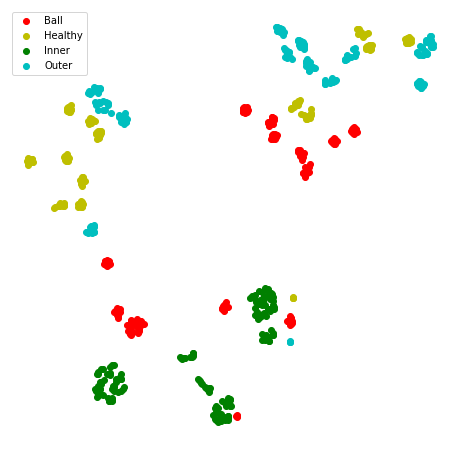

In [ ]:
tsne = TSNE(n_components=2, random_state=seed)

X_2d = tsne.fit_transform(X_for_RF)

train = ['Ball','Healthy','Inner','Outer']

target_ids = range(4)

from matplotlib import pyplot as plt
plt.figure(figsize=(8, 8))
colors = 'r', 'y', 'g', 'c'
for i, c, label in zip(target_ids, colors, train):
    plt.scatter(X_2d[y_train == i, 0], X_2d[y_train == i, 1], c=c, label=label)
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
originaltsne = X_2d

In [ ]:
import pandas as pd

In [ ]:
#exporting just in case
csvtsne = pd.DataFrame(X_2d)
csvtsne.to_csv('/content/drive/MyDrive/Dissertation/Case Western Reserve University Data/12k Drive End Bearing Fault Data/12KHz DE/Image 28x28/MPGAtsne.csv')